In [ ]:
!pip install pillow

In [ ]:
!pip install opencv-python

<ipython-input-3-fec2a5ed8184>:13: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_size = draw.textsize(text, font=font)


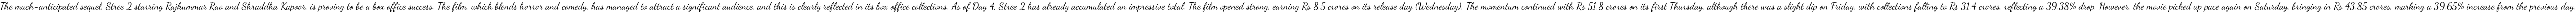

In [ ]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

def text_to_handwriting(text, font_path="/content/DancingScript-VariableFont_wght.ttf", font_size=32):
    # Set up font and size
    font = ImageFont.truetype(font_path, font_size)

    # Determine the size of the image required to hold the text
    dummy_img = Image.new('RGB', (1, 1), (255, 255, 255))
    draw = ImageDraw.Draw(dummy_img)
    text_size = draw.textsize(text, font=font)

    # Create an image with white background
    img = Image.new('RGB', text_size, color=(255, 255, 255))
    draw = ImageDraw.Draw(img)

    # Add text to image
    draw.text((0, 0), text, font=font, fill=(0, 0, 0))

    # Convert to an OpenCV image
    open_cv_image = np.array(img)

    # Convert RGB to BGR
    open_cv_image = open_cv_image[:, :, ::-1].copy()

    # Save or display the image
    cv2.imwrite('handwritten_text.png', open_cv_image)
    cv2_imshow(open_cv_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

if __name__ == "__main__":
    text = "The much-anticipated sequel, Stree 2 starring Rajkummar Rao and Shraddha Kapoor, is proving to be a box office success. The film, which blends horror and comedy, has managed to attract a significant audience, and this is clearly reflected in its box office collections. As of Day 4, Stree 2 has already accumulated an impressive total. The film opened strong, earning Rs 8.5 crores on its release day (Wednesday). The momentum continued with Rs 51.8 crores on its first Thursday, although there was a slight dip on Friday, with collections falling to Rs 31.4 crores, reflecting a 39.38% drop. However, the movie picked up pace again on Saturday, bringing in Rs 43.85 crores, marking a 39.65% increase from the previous day."
    text_to_handwriting(text)
